# 分类和逻辑回归 Classification and Logistic Regression

引入科学计算和绘图相关包：

In [1]:
import numpy as np

import matplotlib.pyplot as plt

分类和回归的唯一区别在于，分类问题中我们希望预测的目标变量 $y$ 只会取少数几个离散值。本节我们将主要关注 **二元分类 binary classification**问题，$y$ 在二元分类中只会取 $0, 1$ 两个值。$0$ 也被称为**反类 negative class**，$1$ 也被称为**正类 positive class**，它们有时也使用符号 $-, +$ 来标识。给定 $x^{(i)}$，对应的 $y^{(i)}$ 也被称为训练样本的**标签 label**。

本节包括以下内容：

1. 逻辑回归 Logistic regression
2. 感知器 The perceptron learning algorithm
3. 牛顿法：最大化 $\ell(\theta)$ 的另一种算法 Newton's Method: Another algorithm for maximizing $\ell(\theta)$

## 1. 逻辑回归 Logistic Regression

在逻辑回归中，我们的假设函数 $h_\theta(x)$ 的形式为：
$$ h_\theta(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}, $$
其中
$$ g(z) = \frac{1}{1+e^{-z}} $$
被称为**logistic函数**或**sigmoid函数**，$g(z)$ 的形式如下：

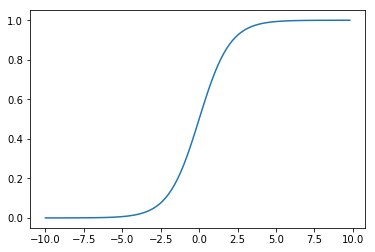

In [2]:
x = np.arange(-10., 10., 0.2)
y = 1 / (1 + np.e ** (-x))
plt.plot(x, y)
plt.show()

当 $z \rightarrow \infty$ 时，$g(z) \rightarrow 1$；当 $z \rightarrow -\infty$ 时，$g(z) \rightarrow 0$；$g(z)$ 的值域为 $(0, 1)$。我们保留令 $x_0 = 1$ 的习惯，$\theta^Tx = \theta_0 + \sum_{j=1}^n \theta_jx_j$。

之后在讲广义线性模型时，我们会介绍sigmoid函数的由来。暂时我们只是将其作为给定条件。sigmoid函数的导数有一个十分有用的性质
$$
\begin{split}
g'(z) &= \frac{d}{dz}\frac{1}{1+e^{-z}} \\
&= \frac{1}{(1+e^{-z})^2}e^{-z} \\
&= \frac{1}{(1+e^{-z})} \cdot (1 - \frac{1}{(1+e^{-z})}) \\
&= g(z) \cdot (1-g(z))
\end{split}
$$

在线性回归的概率诠释中，根据一定的假设，我们通过最大似然估计法计算 $\theta$。类似地，在逻辑回归中，我们也采用同样的策略，假设：
$$ P(y=1|x;\theta) = h_\theta(x) $$
$$ P(y=0|x;\theta) = 1 - h_\theta(x) $$
这两个假设可以合并为：
$$ P(y|x;\theta) = (h_\theta(x))^y(1-h_\theta(x))^{1-y} $$

继续假设 $m$ 个训练样本相互独立，似然函数因此可以写成：
$$
\begin{split}
L(\theta) & = p(y|X; \theta) \\
& = \prod_{i=1}^{m} p(y^{(i)}|x^{(i)}; \theta) \\
& = \prod_{i=1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}
\end{split}
$$

相应的对数似然函数可以写成：
$$
\begin{split}
\ell(\theta) &= logL(\theta) \\
&= \sum_{i=1}^m (y^{(i)}logh(x^{(i)})+(1-y^{(i)})log(1-h(x^{(i)})))
\end{split}
$$

为了求解对数似然函数的最大值，我们可以采用梯度上升的算法 $\theta = \theta + \alpha\nabla_\theta\ell(\theta)$，其中偏导为：
$$
\begin{split}
\frac{\partial}{\partial\theta_j}\ell(\theta) &= \sum(y\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)})\frac{\partial}{\partial\theta_j}g(\theta^Tx) \\
&= \sum(y\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)})g(\theta^Tx)(1-g(\theta^Tx))\frac{\partial}{\partial\theta_j}\theta^Tx \\
&= \sum(y(1-g(\theta^Tx)-(1-y)g(\theta^Tx))x_j \\
&= \sum(y-h_\theta(x))x_j
\end{split}
$$

而对于每次迭代只使用单个样本的随机梯度上升算法而言:
$$ \theta_j = \theta_j + \alpha(y^{(i)}-h_\theta(x^{(i)}))x^{(i)}_j = \theta_j - \alpha(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

可以看到，除去假设函数 $h_\theta(x)$ 本身不同之外，逻辑回归和线性回归的梯度更新是十分类似的。广义线性模型将会解释这里的“巧合”。

## 2. 感知器 The Perceptron Learning Algorithm

在逻辑回归中，我们通过sigmoid函数，使得最终的目标变量落在 $(0, 1)$ 的区间内，并假设目标变量的值就是其为正类的概率。

设想我们使目前变量严格地取 $0$ 或 $1$:
$$ g(z) =\left\{
\begin{aligned}
1 & , z \geq 0 \\
0 & , z < 0
\end{aligned}
\right.
$$

和之前一样，我们令 $h_\theta(x) = g(\theta^Tx)$，并根据以下规则更新：
$$ \theta_j = \theta_j + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)} $$
这个算法被称为**感知器学习算法 perceptron learning algorithm**。

感知器在上世纪60年代一直被视作大脑中单个神经元的粗略模拟。但注意，尽管感知器和逻辑回归的形式非常相似，但由于 $g(z)$ 无法使用概率假设来描述，因为也无法使用最大似然估计法进行参数估计，实际上感知器和线性模型是完全不同的算法类型。之后我们会回到这个话题。

## 3. 牛顿法：最大化 $\ell(\theta)$ 的另一种算法 Newton's Method: Another algorithm for maximizing $\ell(\theta)$

TODO